In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
df_iris = pd.read_csv("./../data/iris.data", header=None, 
                      names=['sepal_length','sepal_width' , 'petal_length', 'petal_width', 'target'])

class_mapping = {v:k for k,v in dict(enumerate(df_iris.target.unique())).items()}

In [3]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


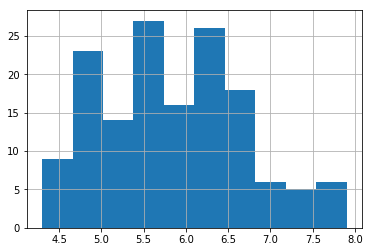

In [4]:
df_iris.sepal_length.hist()

# Sepal Length/Sepal Width

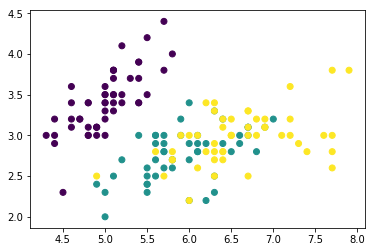

In [5]:
plt.scatter(df_iris.sepal_length.tolist(), df_iris.sepal_width.tolist(),
            c=df_iris.target.apply(lambda x: class_mapping[x]).tolist())

# Sepal Length/ Petal Length

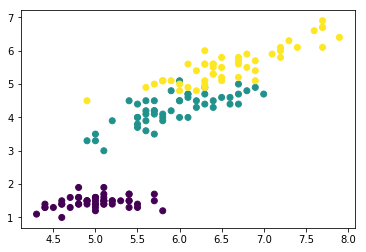

In [6]:
plt.scatter(df_iris.sepal_length.tolist(),
            df_iris.petal_length.tolist(),
            c=df_iris.target.apply(lambda x: class_mapping[x]).tolist())

# Sepal Length/Petal Width

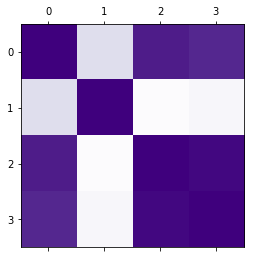

In [7]:
plt.matshow(df_iris.corr(), cmap=plt.cm.Purples)

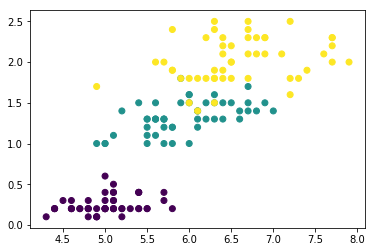

In [8]:
plt.scatter(df_iris.sepal_length.tolist(),
            df_iris.petal_width.tolist(),
            c=df_iris.target.apply(lambda x: class_mapping[x]).tolist())

# Régression logistique

### Fonction d'affichage de la matrice de confusion et du score

In [9]:
from IPython.display import HTML, display, display_html 
import numpy as np
import pandas as pd

def mycfm(y_true, y_pred):  
    """
    Rend une jolie matrice de confusion (cas binaire) et les principaux scores associés
    
    Arguments :
    -----------
    y_true: array
         les vraies classes
    y_pred: array
         les classes prédites 
    """
    CC=pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    """try:
        display_html(CC)
    except:
        print(CC)
    """    
    print(CC)    
    C=np.array(CC)
    score=np.sum(np.diag(C))/len(y_true) - 1
    precision = np.diag(C)/C[:,-1]
    print()
    print('{s:{c}<{n}}{num:2.3}'.format(s='Score',n=15,c='', num=score))
    print(precision[:-2])

### Apprentissage

In [10]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

classifier = LogisticRegression()
features = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
target = df_iris['target']

#Split en deux, une base test et une base d'apprentissage
features_train, features_test, target_train, target_test = train_test_split(
    features, target)

# Apprentissage sur la base d'apprentissage
classifier.fit(features_train, target_train)
score = classifier.score(features_test, target_test)

y_true = target_test
y_pred_cls = classifier.predict(features_test)
mycfm(y_true, y_pred_cls)

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica  All
True                                                              
Iris-setosa               11                0               0   11
Iris-versicolor            0                8               1    9
Iris-virginica             0                0              18   18
All                       11                8              19   38

Score          0.974
[1.         0.88888889]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Apprentissage en découpant de manière optimale les données


In [11]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold()

lrcv = LogisticRegressionCV(cv=4, )

lrcv.fit(features, target)

lrcv.score(features, target)
print("Score sur la base de test : ", score)

print("L'intercept identifié", lrcv.intercept_)
intercept = lrcv.intercept_
print("Les coefficients : ", lrcv.coef_[0])
coeffs = lrcv.coef_[0]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Score sur la base de test :  0.9736842105263158
L'intercept identifié [  1.36941384   7.18794364 -22.52691917]
Les coefficients :  [-0.13038279  0.07501246 -0.38902886 -0.16094089]


# K plus proche voisin

### Basique

In [12]:
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

features = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Converting string labels into numbers
le = preprocessing.LabelEncoder()
target = le.fit_transform(df_iris['target'])

#Split en deux, une base test et une base d'apprentissage
features_train, features_test, target_train, target_test = train_test_split(
    features, target)


k = 5
knn = KNeighborsRegressor(k)
knn.fit(features_train, target_train)

score = knn.score(features_test, target_test)

print("Score sur la base de test : ", score)

y_true = target_test
y_pred_cls = knn.predict(features_test)
mycfm(y_true, y_pred_cls)

Score sur la base de test :  0.8894179894179896
Predicted  0.0  1.0  1.2  1.4  1.6  1.8  2.0  All
True                                             
0           11    0    0    0    0    0    0   11
1            0   14    0    1    2    1    0   18
2            0    0    1    0    0    1    7    9
All         11   14    1    1    2    2    7   38

Score          -0.289
[1.         0.77777778]


### Cross validation avec choix avec choix automatique du nombre de voisins 

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

ks = np.arange(1,50)
R2 = np.zeros((len(ks)+1, 5))

for i in ks:
    knn = KNeighborsRegressor(n_neighbors = i)
    R2[i] = cross_val_score(knn, features, target, cv = 5)

R2[R2==1] = 0
print("Le meilleur k est %s pour un score de %s" %(np.unravel_index(R2.argmax(), R2.shape)[0], np.amax(R2)))

Le meilleur k est 5 pour un score de 0.994


# Pipeline

### Utilisation de GridSearch pour faire de la cross validation et choix auto du nombre de voisins 

In [14]:
from sklearn.neighbors import KNeighborsClassifier as knn

param_grid = [{'n_neighbors': np.arange(1,50)}]

clf = GridSearchCV(knn(), param_grid, cv=5)
clf.fit(features, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
print(clf.best_score_)
print(clf.best_params_)
#clf.grid_scores_

0.98
{'n_neighbors': 6}


### Création d'une pipeline 

In [75]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.decomposition import PCA

estimators = [('reduce_dim', PCA()), ('classifier', knn())]
#Mise en cache des tranformers pour réduire le temps de calcul
cachedir = mkdtemp()

#Création de la pipeline
pipe = Pipeline(estimators, memory=cachedir)

#Paramètre à tester pour trouver le bon nombre de voisins
param_grid = [{'clf__n_neighbors': np.arange(1,50)}]

#Appel de la pipeline en utilisant de la cross validation
clf = GridSearchCV(pipe, param_grid, cv=5)
clf.fit(features, target)

print(clf.best_score_)
print(clf.best_params_)

rmtree(cachedir)

0.98
{'clf__n_neighbors': 7}


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer

column_trans = ColumnTransformer(
     [('iris_category', CountVectorizer(analyzer=lambda x: [x]), 'target')],
      remainder='drop')

column_trans.fit(df_iris)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('iris_category', CountVectorizer(analyzer=<function <lambda> at 0x00000123AA6A81E0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 'target')])

### Création de la fonction load

In [66]:
import importlib

def load(path)
    '''
    Input : path of the file
    output : object containing the data loaded in memory
    '''
    #On récupère le nom de l'extension du fichier
    type = path.split(".")[-1]
    
    #Selection de la bonne fonction de pandas à utiliser
    func_to_call = 'read_{}'.format(type)
    
    #Récupération de l'attribut de la fonction pour l'appeler
    try :
        func = getattr(pd, func_to_call)
    except :
        print("Pas de fonction disponible dans pandas pour lire les données")
        return -1
    
    #Lecture des données
    try :
        return func(path)
    except :
        print("path incorrect")
        return -1

In [62]:
b = load('./../data/iris.csv')

### Récupération du type de machine learning effectuer dans la pipeline

In [77]:
classifier = clf.best_estimator_.named_steps['classifier']

In [82]:
clf.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory='C:\\Users\\elias\\AppData\\Local\\Temp\\tmp37f6n3fj',
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'clf__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>